In [1]:
from utils import gen_dataset
from utils import treine
from utils import Eval_metric
from utils import predict
import torch
from modelo import Linear
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import sys as s
import warnings
warnings.filterwarnings('ignore')

### Entenda o dataset usando a função gen_dataset(proportion, explanation)

Rodando a função obten-se uma explicação de como salvamos através de pickle os objetos de treino e teste:

$$\begin{cases}
&TREINO:\begin{cases}&INPUT\_TRAIN\\&TRAIN\_LABELS\end{cases}\\
&TESTE:\begin{cases}&{INPUT\_TEST}\\&TEST\_LABELS\end{cases}
\end{cases}
$$

In [2]:
Input, Output, Input_test, Output_test = gen_dataset(5, True)


Nosso dataset possui 45 gráficos que representam o sinal de uma célula até completar a mitose
Cada gráfico gera dois exemplos de treino, então o nosso dataset tem tamanho 90. 
Separando o dataset por um dado de entrada (Input) e um valor correto de saída (Output) :
np.shape(Input) =  (50, 30) : os 50 primeiros gráficos de intervalo  30.
np.shape(Output) =  (50,) : o vetor de 50 valores corretos, que segundo a organização do dataset, é composto de [0,1,0,1,...]
np.shape(Input_Test) (40, 30) : os últimos 40 gráficos de intervalo  30.
np.shape(Output_Test) (40,) : o vetor de 40 valores corretos é composto de [0,1,0,1,...]
Separando o dataset em grupos de 10, ou seja, batch_size = 10. O dataset fica pronto para realizar o treino
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_Test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])
Por exemplo, inp[0][0] representa os primeiros 30 pontos e inp[0][1] os últimos 30 pontos do mesmo gráfico


In [2]:
def eval_model(proportion,epochs):
    y1 = []
    y2 = []
    _, _, inp, out = gen_dataset(proportion, False)
    model = Linear()
    #erro, acerto = Eval_metric(model, 'test')
    #print('antes de treinar o modelo acertou {} do conjunto de teste'.format(acerto))
    #print('antes de treinar o modelo errou {} do conjunto de teste'.format(erro))
    erro1,erro2,Epochs = treine(model, epochs)
    plt.plot(Epochs, erro1, label='erro-teste')
    plt.plot(Epochs, erro2, label='erro-treino')
    plt.legend()
    plt.xlabel('Epocas de treino')
    plt.suptitle('Porcentagens de erros quando treinado com {} exemplos'.format((proportion)*10))
    plt.title('Nesse gráfico foi usado os restantes {} exemplos de teste'.format((9-proportion)*10))
    plt.show()


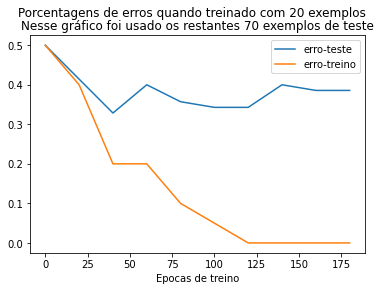

In [3]:
eval_model(2,200)

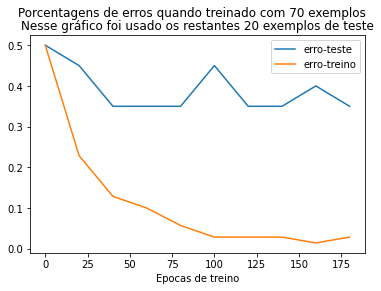

In [4]:
eval_model(7,200)

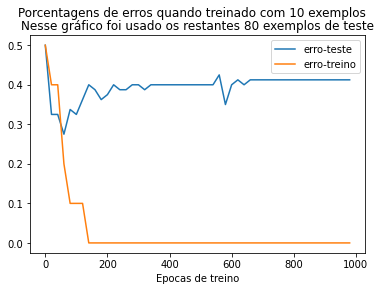

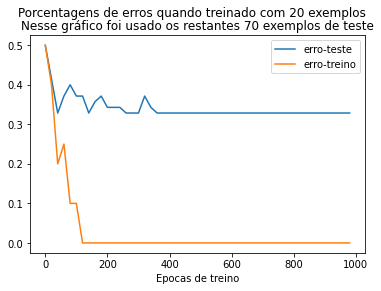

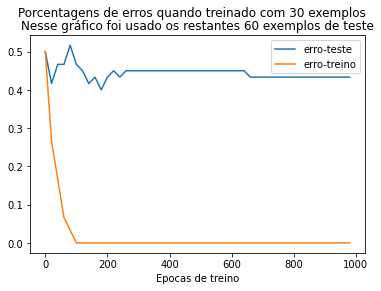

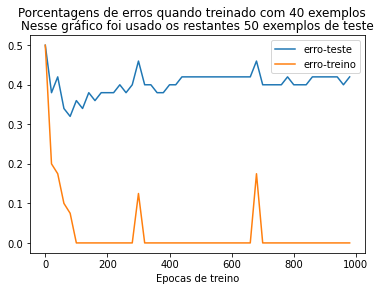

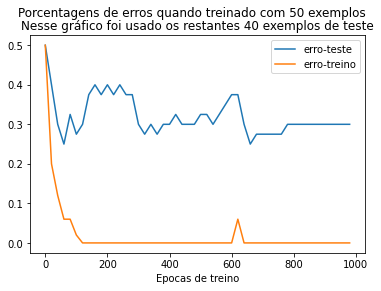

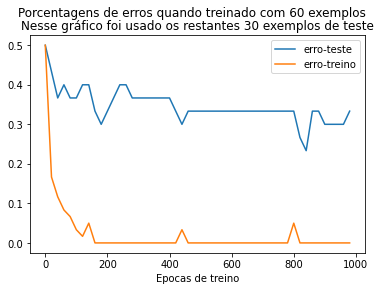

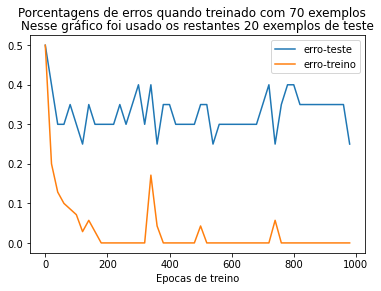

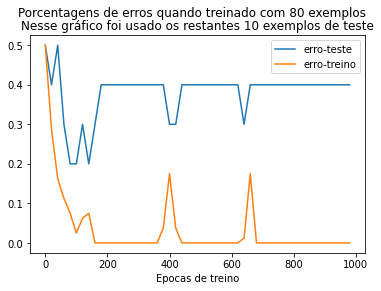

In [6]:
for i in range(1, 9):
    eval_model(i,1000)